In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob 

In [3]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

Visulaization

In [4]:
x_data = []
y_data = []

In [5]:
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category)
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:31<00:00, 109.79it/s]


In [6]:
data.shape

(22564, 2)

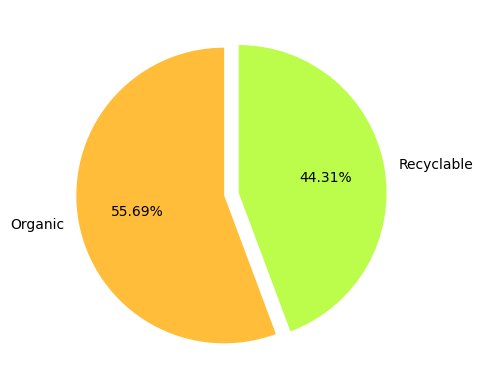

In [7]:
colors = ['#ffbd39', '#BCFD4C']
plt.pie(data['label'].value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors,startangle=90, explode=[0.05,0.05])
plt.show()

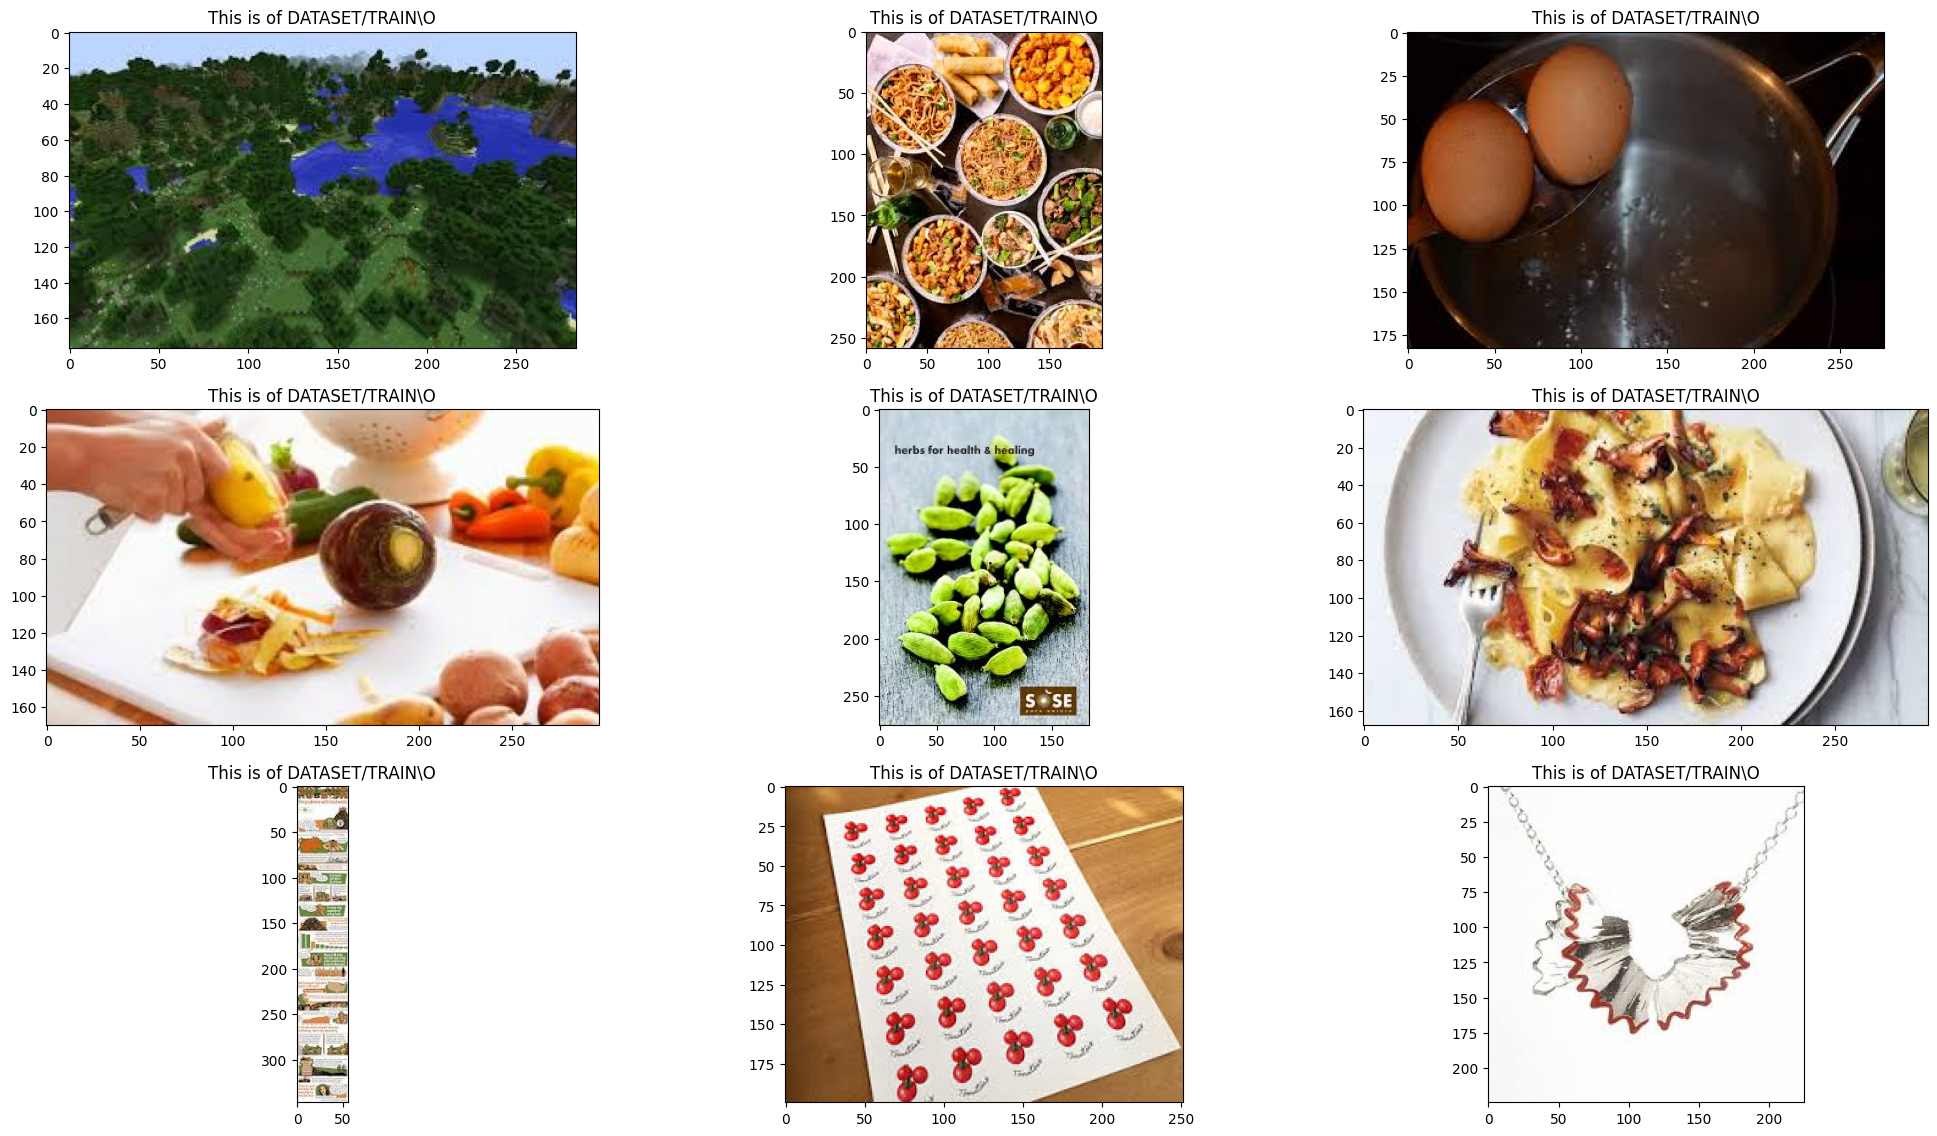

In [8]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(4,3,(i%12)+1)
  index = np.random.randint(15000)
  plt.title('This is of {0}'.format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()

## CNN- Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size = 256


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,811,970 (182.39 MB)

 Trainable params: 47,811,970 (182.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generatior = train_datagen.flow_from_directory(
  train_path,
  target_size = (224,224),
  batch_size=batch_size,
  color_mode = "rgb",
  class_mode = "categorical"
)

test_generatior = train_datagen.flow_from_directory(
  test_path,
  target_size = (224,224),
  batch_size=batch_size,
  color_mode = "rgb",
  class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


: 

In [ ]:
hist = model.fit(
  train_generatior,
  epochs = 10 ,
  validation_data = test_generatior
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 63168s 716s/step - accuracy: 0.7292 - loss: 0.8291 - val_accuracy: 0.8782 - val_loss: 0.3521
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 16196s 183s/step - accuracy: 0.8231 - loss: 0.4297 - val_accuracy: 0.8866 - val_loss: 0.3342
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 120s/step - accuracy: 0.8422 - loss: 0.3865  